In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default="svg"

In [2]:
### Importing Dataset
raw_df=pd.read_csv("Zomato_Chennai _Dataset.csv")

In [3]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [4]:
### Getting basic informations about dataset
raw_df.shape

(12032, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
Zomato URL               12032 non-null object
Name of Restaurant       12032 non-null object
Address                  12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [6]:
### CLEANING THE DATASET
## a. Removing the redundant rows

# Checking for null values
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [7]:
## b. Drop the columns not required for further analysis

raw_df.drop(['Zomato URL','Address'],axis=1,inplace=True)
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [8]:
## c. Convert the datatypes of numerical column to numerical datatype

raw_df['Dining Rating'].value_counts()

None    5351
3.6      584
3.5      553
3.7      525
3.4      500
3.3      463
3.8      460
3.2      433
3.9      379
3.1      363
2.0      354
3.0      302
4.0      288
2.9      257
4.1      221
2.8      192
4.2      142
2.7      138
4.3      105
2.6       99
2.5       71
4.4       61
2.4       46
4.5       36
2.3       32
2.2       20
4.6       17
4.7       12
2.1       10
4.9        7
4.8        4
1.9        3
1.7        2
0.3        1
1.0        1
Name: Dining Rating, dtype: int64

In [9]:
raw_df['Dining Rating'].replace(to_replace=['None'],value='0',inplace=True)

In [10]:
raw_df['Dining Rating Count'].value_counts()

Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
677                             1
288                             1
901                             1
812                             1
527                             1
Name: Dining Rating Count, Length: 794, dtype: int64

In [11]:
raw_df['Dining Rating Count'].replace(to_replace=['Does not offer Dining','Not enough Dining Reviews','None'],value='0',inplace=True)

In [12]:
raw_df['Delivery Rating'].value_counts()

None    5851
3.9     1383
3.8      701
4.0      570
3.7      559
4.1      468
3.6      465
4.2      401
3.5      314
4.3      277
3.4      259
3.3      189
4.4      128
3.2       93
3.1       79
3.0       63
4.5       55
2.9       39
2.8       26
4.6       24
2.7       19
2.6       17
2.5        9
0.3        8
2.4        7
1.8        5
2.3        5
2.2        5
2.0        5
4.7        4
2.1        2
1.6        1
1.5        1
Name: Delivery Rating, dtype: int64

In [13]:
raw_df['Delivery Rating'].replace(to_replace=['None'],value='0',inplace=True)

In [14]:
raw_df['Delivery Rating Count'].value_counts()

Not enough Delivery Reviews    3379
Does not offer Delivery        2252
None                            220
27                               34
22                               30
                               ... 
4384                              1
39600                             1
896                               1
8344                              1
894                               1
Name: Delivery Rating Count, Length: 2282, dtype: int64

In [15]:
raw_df['Delivery Rating Count'].replace(to_replace=['Not enough Delivery Reviews','Does not offer Delivery','None'],value='0',inplace=True)

In [16]:
# Change Datatype of Numerical columns
raw_df['Dining Rating']=raw_df['Dining Rating'].astype('float64')
raw_df['Dining Rating Count']=raw_df['Dining Rating Count'].astype('int64')
raw_df['Delivery Rating']=raw_df['Delivery Rating'].astype('float64')
raw_df['Delivery Rating Count']=raw_df['Delivery Rating Count'].astype('int64')

In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
Name of Restaurant       12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null float64
Dining Rating Count      12032 non-null int64
Delivery Rating          12032 non-null float64
Delivery Rating Count    12032 non-null int64
Features                 12032 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 940.1+ KB


In [18]:
## d. Working with Cuisine, Top Dishes
raw_df['Cuisine']=raw_df['Cuisine'].str.replace('[','',regex=True)
raw_df['Cuisine']=raw_df['Cuisine'].str.replace("'",'',regex=True)
raw_df['Cuisine']=raw_df['Cuisine'].str.replace("]",'',regex=True)

raw_df['Top Dishes']=raw_df['Top Dishes'].str.replace('[','',regex=True)
raw_df['Top Dishes']=raw_df['Top Dishes'].str.replace("'",'',regex=True)
raw_df['Top Dishes']=raw_df['Top Dishes'].str.replace("]",'',regex=True)

raw_df['Features']=raw_df['Features'].str.replace('[','',regex=True)
raw_df['Features']=raw_df['Features'].str.replace("'",'',regex=True)
raw_df['Features']=raw_df['Features'].str.replace("]",'',regex=True)

In [19]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"


In [20]:
## e. Finding and removing restaurants with 0 Dining rating, Dining rating counts, Delivery rating, Delivery rating counts

useless=(raw_df['Dining Rating']==0.0) | (raw_df['Delivery Rating']==0.0) | (raw_df['Dining Rating Count']==0) | (raw_df['Delivery Rating Count']==0)
raw_df[useless]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,Biryani,"Bread Halwa, Mutton Biryani, Brinjal Gravy, ...",350.0,0.0,0,4.3,1061,Home Delivery
15,Welcome Hotel,Purasavakkam,"South Indian, Desserts, Beverages","Pongal, Podi Dosa, Idli Sambar, Vada Curry,...",300.0,4.5,1094,0.0,0,"Breakfast, Vegetarian Only, Indoor Seating"
18,Wire Room Bar & Kitchen,"Phoenix Market City, Velachery","Continental, Asian","Cocktails, Salad, Beer, Tikka, Pork Ribs, ...",2000.0,4.1,354,0.0,0,"Full Bar Available, Mall Parking, Dance Floor,..."
23,BFF 2.0,RA Puram,"North Indian, Continental, Italian","Crispy Chicken, Cocktails, Pizza, Nachos, ...",1500.0,4.2,464,0.0,0,"Full Bar Available, Indoor Seating, Nightlife,..."
77,Al Dhareeq Beef Biriyani,Kodambakkam,Biryani,Beef Biryani,300.0,0.0,0,3.9,19600,Home Delivery
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12028,CK's Sandwiches,Kolathur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12029,CK's Sandwiches,Anna Nagar East,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12030,CK's Sandwiches,Ramapuram,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"


In [21]:
raw_df['Location'].value_counts()

Porur                                         418
Velachery                                     372
Ambattur                                      334
T. Nagar                                      315
Perungudi                                     288
                                             ... 
The Pride Hotel, Kilpauk                        1
Hotel Blue Diamond, Kilpauk                     1
Hotel Peninsula, T. Nagar                       1
Green Coconut Resort, Kanchipuram District      1
Hotel Poigai, Arumbakkam                        1
Name: Location, Length: 268, dtype: int64

In [22]:
raw_df['Location']=raw_df['Location'].str.replace('(','',regex=True)
raw_df['Location']=raw_df['Location'].str.replace(')','',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Ambit IT Park, Ambattur|Eat And Pack|Ambattur, Ambattur|Ambattur ','Ambattur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Ponnis Grand Inn Hotel','Thiruvallur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('T. Nagar, T. Nagar|Paati Veedu, T.Nagar|Benzz Park|T. Nagar, T. Nagar|Hotel Sudhara, T. Nagar','T. Nagar',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Grand Residence Hotel|Porur, Porur','Porur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Gokulam Park Hotel|Ashok Nagar, Ashok Nagar','Ashok Nagar',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Thiruvallur, Thiruvallur','Thiruvallur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('OMR OMR|Novotel Chennai, OMR|OMR |Holiday Inn Chennai OMR IT Expressway|RMZ Millenia Business Park, Old Mahabalipuram Road|Citadines|Gokulam Park Sabari - OMR, Old Mahabalipuram Road|OMR OMR','OMR',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('The Spring Hotel, Nungambakkam|Ispahani Centre, Nungambakkam|The Park, Nungambakkam|Harrisons Hotel, Nungambakkam','Nungambakkam',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Somerset Greenways','MRC Nagar',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Spectrum The Grand Venus Mall, Perambur','Perambur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('RK Salai Cathedral Road|New Woodlands Hotel, Mylapore','Mylapore',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Ranga Residency, Chengalpattu|Fairfield by Marriot, Chengalpattu','Chengalpattu',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Hilton Chennai, Guindy','Guindy',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('TNHB Complex, Adyar','Adyar',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Hotel Bhimaas, Vadapalani|Ambica Empire, Vadapalani|Forum Vijaya Mall, Vadapalani','Vadapalani',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('East Coast Road ECR|ECR |Kipling, East Coast Road|ECR (ECR)|ECRECR','ECR',regex=True)
raw_df['Location']=raw_df['Location'].str.replace("The King's Hotel, Egmore|Hotel Marina Inn, Egmore",'Egmore',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Phoenix Market City, Velachery|Foodies Kitchen|The Grand Mall, Velachery','Velachery',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Kora Food Street, Anna Nagar West','Anna Nagar West',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Chennai Food Town, Thuraipakkam|OMRFood Street,Thuraipakkam','Thuraipakkam',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('DLF IT Park, Ramapuram','Ramapuram',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Hotel Rajpark, Alwarpet','Alwarpet',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Sathyam Cinemas Complex, Royapettah','Royapettah',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Hotel Vassi Palaze, Kanchipuram District|Hotel Sathyam Grand Resort, Kanchipuram District','Kanchipuram District',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('OMRFood Street, Perumbakkam','Perumbakkam',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Hotel Centre Point, Sholinganallur','Sholinganallur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('TNHB Complex, Besant Nagar','Besant Nagar',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Mayajaal Multiplex, Kanathur','Kanathur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Massbunk Complex, Purasavakkam','Purasavakkam',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Hotel SRR Grand, Vandalur','Vandalur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Ascendas IT Park, Taramani','Taramani',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('OMRFood Street, Guduvancheri','Guduvancheri',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('OMRFood Street, Navallur','Navallur',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Spencer Plaza Mall, Thousand Lights','Thousand Lights',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('St. Thomas Mount','Guindy',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Ampa Skywalk Mall, Aminijikarai','Aminijikarai',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('OMRFood Street, Injambakkam','Injambakkam',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('OMRFood Street, Kandanchavadi','Kandanchavadi',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('Chennai Citi Centre, Mylapore','Mylapore',regex=True)
raw_df['Location']=raw_df['Location'].str.replace('','',regex=True)

#raw_df['Location']=raw_df['Location'].str.replace('','',regex=True)


In [23]:
raw_df['Location'].value_counts()

Velachery                                     423
Porur                                         418
Ambattur                                      347
T. Nagar                                      320
Perungudi                                     288
                                             ... 
Ambattur, Ambattur                              1
IBIS Chennai, OMR                               1
The Westin Chennai, Velachery                   1
Radisson Blu, Egmore                            1
Green Coconut Resort, Kanchipuram District      1
Name: Location, Length: 222, dtype: int64

In [24]:
raw_df=raw_df[~useless]

In [25]:
## f. Removing Duplicate records

raw_df[raw_df.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [26]:
raw_df.head(50)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
5,Dine N Fun,Medavakkam,"South Indian, North Indian, Chinese","Chicken Grill, Shawarma, Naan, Chicken Butt...",450.0,4.1,567,3.8,24700,"Home Delivery, Indoor Seating"
7,Cafe Arabica,Anna Nagar East,"Cafe, Fast Food","Burgers, Pasta, Sandwich, Strawberry Mojito...",800.0,4.3,668,4.3,4320,"Breakfast, Home Delivery, Indoor Seating, Dess..."
8,Savoury Sea Shell,Anna Nagar East,"Arabian, Chinese, North Indian, Lebanese, ...","Shawarma, Chicken Grill, Brownie, Sea Food,...",1400.0,4.2,2564,4.1,21700,"Home Delivery, Indoor Seating, Card Upon Deliv..."
9,Sangeetha Veg Restaurant,T. Nagar,"South Indian, North Indian, Chinese, Chetti...","Filtered Coffee, Chaat, Faluda, Masala Dosa...",800.0,4.4,1578,4.2,39600,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
10,McDonald's,Velachery,"Burger, Fast Food","Burgers, Peri Peri Fries, French Fries, Mah...",500.0,3.9,743,3.9,6226,"Breakfast, Home Delivery, Indoor Seating"


In [27]:
### COPYING CLEAN DATASET INTO A NEW DATAFRAME

Zomato=raw_df.copy()

In [28]:
Zomato.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"


### EXPLORATORY DATA ANALYSIS

In [29]:
# 1. Which are the top 10 Biriyani Restaurants in Chennai?

biriyani=Zomato[Zomato['Cuisine'].str.contains('Biryani')]
#fig=px.histogram(Zomato,x=veg,color='Cuisine',title='No. of restaurants by cuisine tpye',labels={'Cuisine':'Cuisine Type'})
#fig.show()
biriyani.sort_values(by=['Dining Rating'],ascending=False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
116,AlMaza,Anna Nagar East,"Arabian, Mughlai, North Indian, Biryani","Faluda, Rara Gosht, Buttermilk, Naan, Bhar...",1000.0,4.6,764,4.2,881,"Home Delivery, Indoor Seating, Table booking r..."
9037,Palmshore,Medavakkam,"North Indian, Chinese, Arabian, BBQ, Birya...","Mutton Mandi, Biryani, Brownie, Bbq Fish, ...",1000.0,4.5,1942,3.8,4379,"Home Delivery, Valet Parking Available, Indoor..."
96,Urban Spatula,Anna Nagar West,"Continental, Seafood, Biryani, Italian, No...","Burgers, Pasta, Fish, Fries, Chips, Salad...",800.0,4.4,794,4.3,911,"Home Delivery, Free Parking, Table booking rec..."
9038,Palmshore,Ramapuram,"North Indian, Chinese, Arabian, BBQ, Birya...","Fish, Brownie, Faluda, Murgh Platter, Praw...",1000.0,4.4,4805,4.1,17300,"Home Delivery, Valet Parking Available, Table ..."
47,Palmshore,Egmore,"North Indian, Chinese, Arabian, BBQ, Birya...","Mutton Mandi, Fish, Brownie, Sea Food, Bir...",1000.0,4.4,2162,4.0,9721,"Home Delivery, Indoor Seating, Table booking f..."
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
9041,Palmshore,Koyambedu,"North Indian, Chinese, Arabian, BBQ, Birya...",Invalid,1000.0,4.3,413,3.9,371,"Home Delivery, Valet Parking Available, Indoor..."
126,The Feast,Anna Nagar East,"North Indian, Chinese, Biryani","Bbq Chicken, Biryani, Salad, Mushroom Soup,...",800.0,4.3,652,3.9,4352,"Home Delivery, Buffet, Free Parking, Indoor Se..."
153,The Bayleaf,Gopalapuram,"Mughlai, North Indian, Seafood, Biryani","Rolls, Fish, Kathi Roll, Biryani, Paratha,...",800.0,4.3,542,4.0,224,"Home Delivery, Indoor Seating, Wifi, Table boo..."
165,Copper Chimney,Gopalapuram,"North Indian, Arabian, Biryani, Mughlai","Paneer Tikka, Naan, Dal Makhani, Rumali Rot...",1200.0,4.3,906,4.2,1232,"Home Delivery, Indoor Seating, Table reservati..."


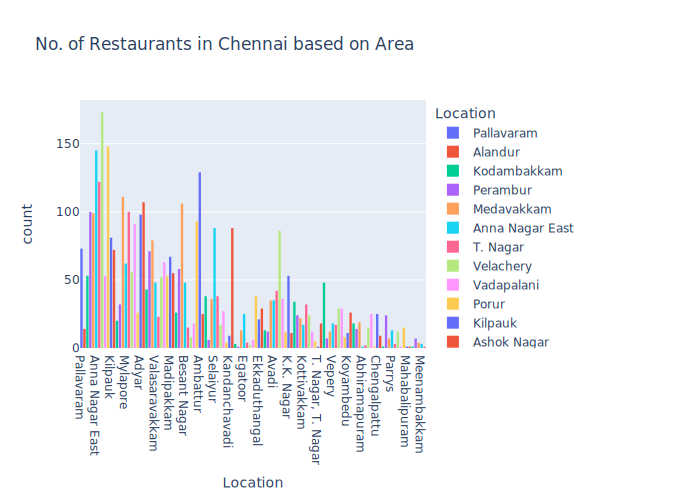

In [30]:
# 2. Number of restaurants in Chennai according to areas

fig=px.histogram(Zomato,x='Location',color='Location',title='No. of Restaurants in Chennai based on Area')
fig.show()

In [31]:
# 3. Which are the top 10 highest rated seafood restaurants in Chennai

seafood=Zomato[Zomato['Cuisine'].str.contains('Seafood')]
seafood.sort_values(by='Dining Rating',ascending=False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
195,The Marina,Nungambakkam,"Seafood, North Indian, Chinese","Sea Food, Jumbo Prawns, Biryani, Fish Mango...",1600.0,4.8,1082,4.3,373,"Home Delivery, Indoor Seating, Table reservati..."
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,"Finger Food, Seafood, Italian, Continental","Cocktails, Pasta, Nachos, Mashed Potato, S...",1600.0,4.5,964,3.4,50,"Home Delivery, Full Bar Available, Free Parkin..."
315,Layalee,Ekkaduthangal,"Arabian, BBQ, Seafood, Chinese, Continenta...","Fish, Faluda, Shawarma, Brownie, Mutton Bi...",700.0,4.4,586,4.1,143,"Home Delivery, Table booking recommended, Indo..."
96,Urban Spatula,Anna Nagar West,"Continental, Seafood, Biryani, Italian, No...","Burgers, Pasta, Fish, Fries, Chips, Salad...",800.0,4.4,794,4.3,911,"Home Delivery, Free Parking, Table booking rec..."
14,Hotel Paramount,Kilpauk,"North Indian, Chinese, Seafood, South India...","Biryani, Butter Chicken, Tandoori Chicken, ...",500.0,4.3,1266,4.2,17700,"Breakfast, Home Delivery, Indoor Seating, Cate..."
133,Azzuri Bay,Adyar,"Italian, Mediterranean, Thai, Seafood, Sal...","Pasta, Pizza, Sea Food, Tiramisu, Chicken ...",1000.0,4.3,2430,4.0,369,"Home Delivery, Rooftop, Table reservation requ..."
9027,Copper Kitchen,Kotturpuram,"North Indian, Chinese, Chettinad, Seafood","Brownie, Faluda, Biryani, Bbq Chicken, Sha...",1000.0,4.3,1739,3.7,8659,"Home Delivery, Indoor Seating, Table booking r..."
9026,Copper Kitchen,Porur,"North Indian, Chinese, Chettinad, Seafood","Faluda, Bbq Chicken, Brownie, Biryani, Sha...",1000.0,4.3,5073,3.9,26800,"Home Delivery, Sports TV, Indoor Seating, Tabl..."
237,The Cascade,Nungambakkam,"Seafood, Chinese, Asian, Thai, Momos","Momos, Phuket Fish, Dragon Chicken, Lamb, ...",1000.0,4.3,613,4.1,1886,"Home Delivery, Wheelchair Accessible, Valet Pa..."
153,The Bayleaf,Gopalapuram,"Mughlai, North Indian, Seafood, Biryani","Rolls, Fish, Kathi Roll, Biryani, Paratha,...",800.0,4.3,542,4.0,224,"Home Delivery, Indoor Seating, Wifi, Table boo..."


In [32]:
# 5. How many restaurants have highest ratings in overall Chennai

highRated=Zomato[Zomato['Dining Rating']>=4.8]
highRated

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
57,Brownie Heaven,Royapettah,"Bakery, Desserts, Beverages","Vanilla Ice Cream, Brownie Shake, Filtered C...",350.0,4.9,842,4.3,2270,"Home Delivery, Indoor Seating, Desserts and Bakes"
62,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,"Desserts, Ice Cream","Sandwich, Gelato, Chocolate Icecreams, Wate...",500.0,4.8,1516,4.5,361,"Home Delivery, Outdoor Seating, Desserts and B..."
105,Bhangra,Kanathur,North Indian,"Butter Chicken, Dal Makhani, Sweet Lassi, K...",800.0,4.9,2109,4.0,2226,"Breakfast, Home Delivery, Mall Parking, Indoor..."
155,The Sandwich Shop,West Mambalam,"Sandwich, Fast Food, Beverages","Mocktails, Fries, Pizza Sandwich, Tandoori ...",300.0,4.9,584,4.4,895,"Home Delivery, Vegetarian Only, Bulk Orders Ac..."
163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"Momos, Chinese","Momos, Noodle, Chowmein, Fried Momo, Chop ...",350.0,4.8,1658,4.5,2825,"Home Delivery, Free Parking, Indoor Seating"
184,Gossip Fusion Bistro,Kanathur,"Italian, Continental, Burger, Sandwich, Wr...","Tender Coconut Mousse, Iced Tea, Pasta, Piz...",1500.0,4.9,996,4.3,500,"Breakfast, Home Delivery, Free Parking, Table ..."
192,Kabab Corner,Egmore,"Kebab, Rolls, Mughlai","Rolls, Beef Fry, Beef Steak, Chicken Kebab,...",450.0,4.9,1053,4.3,2080,"Home Delivery, Indoor Seating, Catering Available"
195,The Marina,Nungambakkam,"Seafood, North Indian, Chinese","Sea Food, Jumbo Prawns, Biryani, Fish Mango...",1600.0,4.8,1082,4.3,373,"Home Delivery, Indoor Seating, Table reservati..."
219,Prems Graama Bhojanam,Adyar,South Indian,"Benne Dosa, Buttermilk, Thatte Idli, Kulfi,...",500.0,4.9,1511,4.1,4621,"Home Delivery, Vegetarian Only, Indoor Seating..."
320,Bombay Kulfi,Adyar,Ice Cream,"Kesar Pista Kulfi, Malai Kulfi, Chocolate Ku...",200.0,4.9,534,4.3,1476,"Home Delivery, Free Parking, Outdoor Seating, ..."


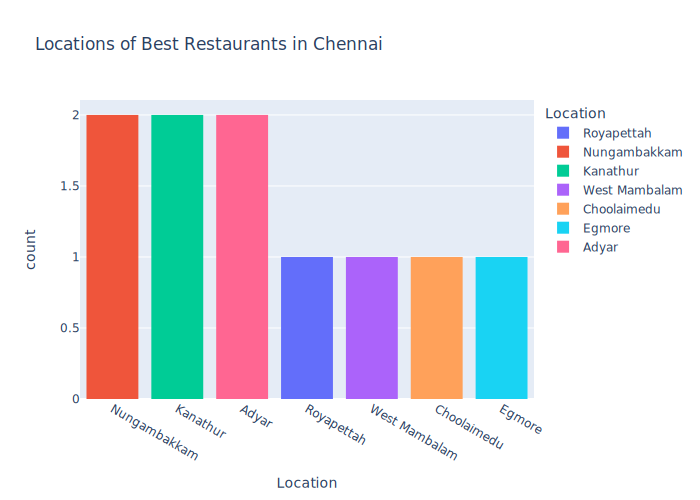

In [34]:
disp=px.histogram(highRated,x='Location',color='Location',title='Locations of Best Restaurants in Chennai').update_xaxes(categoryorder='total descending')
disp.show()

In [35]:
HighRated_values=highRated['Location'].value_counts().reset_index()
HighRated_values.rename(columns={'index':'Location','Location':'No. of Restaurants'},inplace=True)
HighRated_values

,Location,No. of Restaurants
0,Kanathur,2
1,Nungambakkam,2
2,Adyar,2
3,Egmore,1
4,Royapettah,1
5,West Mambalam,1
6,Choolaimedu,1


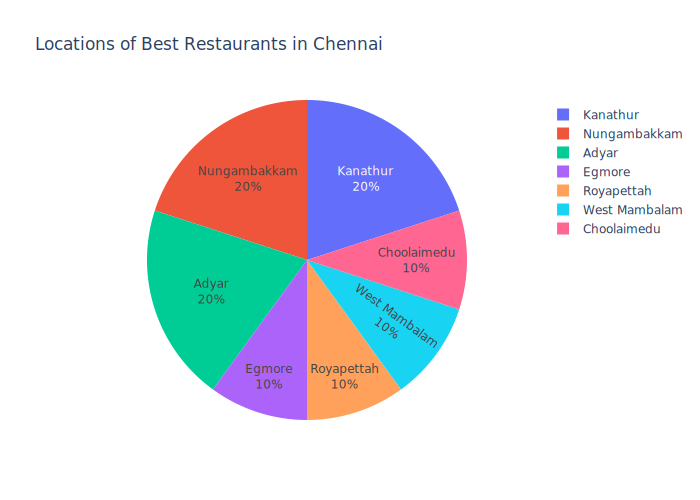

In [36]:
displ=px.pie(HighRated_values,names='Location',values='No. of Restaurants',color='Location',title='Locations of Best Restaurants in Chennai').update_traces(textposition='inside',textinfo='percent+label')
displ.show()

In [41]:
# 6. Display the top 10 vegetarian restaurants in chennai

veg=Zomato[Zomato['Features'].str.contains('Vegetarian Only')]
Top=veg.sort_values(by=['Dining Rating'],ascending=False).head(10)
Top

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
155,The Sandwich Shop,West Mambalam,"Sandwich, Fast Food, Beverages","Mocktails, Fries, Pizza Sandwich, Tandoori ...",300.0,4.9,584,4.4,895,"Home Delivery, Vegetarian Only, Bulk Orders Ac..."
219,Prems Graama Bhojanam,Adyar,South Indian,"Benne Dosa, Buttermilk, Thatte Idli, Kulfi,...",500.0,4.9,1511,4.1,4621,"Home Delivery, Vegetarian Only, Indoor Seating..."
24,Eating Circles,Alwarpet,South Indian,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas...",250.0,4.7,782,4.2,2744,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
108,Rayar's Mess,Mylapore,South Indian,"Pongal, Vada, Filtered Coffee, Idli, Bonda...",100.0,4.7,904,4.3,1319,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
70,Little Italy,Besant Nagar,"Italian, Mexican, Salad","Pasta, Pizza, Nachos, Tiramisu, Minestrone...",1500.0,4.7,1349,4.2,1435,"Home Delivery, Vegetarian Only, Valet Parking ..."
75,Fusilli Reasons,Kilpauk,Fast Food,"Nachos, Iced Tea, Garlic Bread, Brownie, S...",400.0,4.7,3042,4.4,3954,"Home Delivery, Vegetarian Only, Indoor Seating..."
37,Shree Mithai,Chetpet,"Mithai, Street Food, Fast Food","Chaat, Badam Milk, Pav Bhaji, Panipuri, Ra...",300.0,4.6,1085,4.4,18600,"Breakfast, Home Delivery, Vegetarian Only, Fre..."
50,Andhikkadai,Velachery,South Indian,"Coffee, Sweet Kozhukattai, Idli, Pongal, K...",200.0,4.6,908,4.2,17300,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
255,Krispy Kreme,"Express Avenue Mall,Royapettah","Desserts, Beverages","Coffee, Hot Chocolate, Cappuccino, Chocolat...",400.0,4.6,711,4.2,748,"Home Delivery, Wheelchair Accessible, Vegetari..."
234,Hamsa,Adyar,"North Indian, Chettinad, Mughlai, Desserts,...","Gulab Jamun, Cheese Kurkuri, Tomato Shorba, ...",1800.0,4.6,825,4.4,241,"Home Delivery, Wheelchair Accessible, Vegetari..."


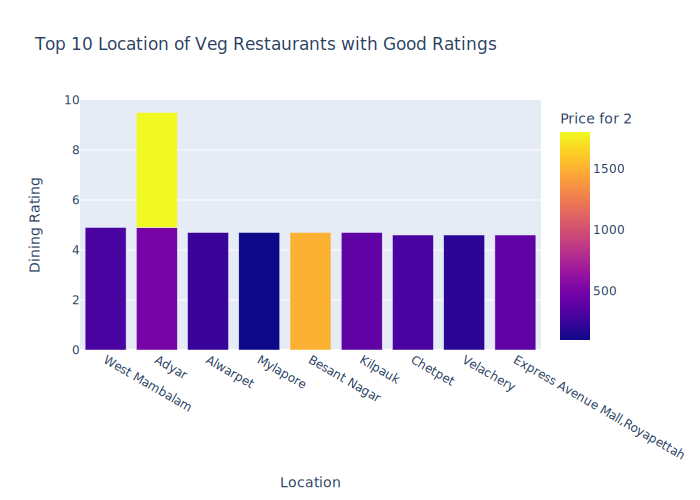

In [42]:
fig=px.bar(Top,x='Location',y='Dining Rating',color='Price for 2',title='Top 10 Location of Veg Restaurants with Good Ratings')
fig.show()

In [47]:
# 7. Is there a relation between the Price for two and Rating by Location?

price_rate=Zomato.groupby(['Location','Dining Rating'])['Price for 2'].mean().reset_index()
show=price_rate.head(50)
show

,Location,Dining Rating,Price for 2
0,Abhiramapuram,3.9,200.000000
1,Adambakkam,2.0,300.000000
2,Adambakkam,2.2,700.000000
3,Adambakkam,2.5,250.000000
4,Adambakkam,2.7,200.000000
5,Adambakkam,2.8,250.000000
6,Adambakkam,2.9,433.333333
7,Adambakkam,3.0,500.000000
8,Adambakkam,3.1,200.000000
9,Adambakkam,3.2,350.000000


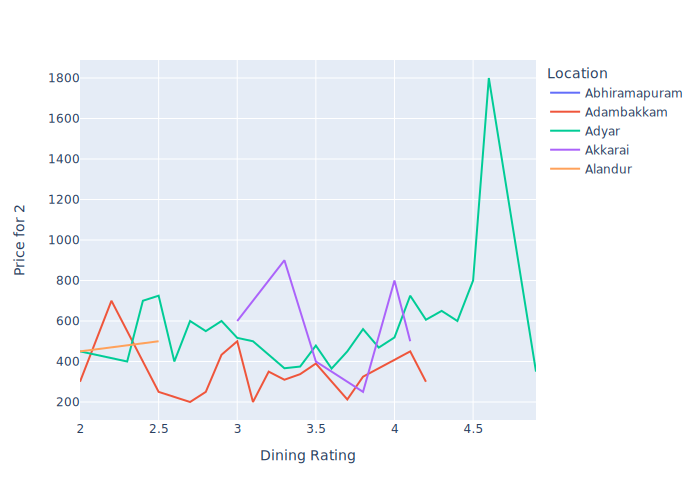

In [48]:
fig=px.line(show,x='Dining Rating',y='Price for 2',color='Location')
fig.show()

In [51]:
# 8. Find the list of Affordable Restaurants
## -> Criteria: Low Price , High Rating
## (i) Price = 1/4 max price

max_price=Zomato['Price for 2'].max()
eco=max_price/4
max_price,eco

(3000.0, 750.0)

In [52]:
## (ii) Filtering the restaurants with price less than or equal to 750

aff_df=Zomato[['Name of Restaurant','Location','Cuisine','Price for 2']]
aff_df=aff_df[aff_df['Price for 2']<=750]
aff_df.sort_values(by='Price for 2',inplace=True)
aff_df

,Name of Restaurant,Location,Cuisine,Price for 2
108,Rayar's Mess,Mylapore,South Indian,100.0
1518,Lassi Junction,Anna Nagar West,"Beverages, Ice Cream",100.0
4564,Iniyavai Delicious Veg Restaurant,Ambattur,South Indian,100.0
5862,A.P.S Chat,Vadapalani,Street Food,100.0
2151,Cane 4 U,Besant Nagar,Beverages,100.0
...,...,...,...,...
8817,Savoury Sea Shell,Thousand Lights,"Chinese, BBQ, South Indian",750.0
10074,Long Live Pizza,Injambakkam,"Pizza, Fast Food",750.0
2296,Ponnis Grand Inn,Thiruvallur,Thai,750.0
2102,Al Arz Restaurant,George Town,"Arabian, BBQ, Chinese, North Indian",750.0


In [53]:
GoodRating=Zomato[['Name of Restaurant','Location','Cuisine','Price for 2','Dining Rating']]
GoodRating=GoodRating[GoodRating['Dining Rating']>=4.5]
GoodRating.sort_values(by='Dining Rating',inplace=True)
GoodRating

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating
115,North East Kitchen,Egmore,"Chinese, Konkan, Momos",450.0,4.5
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,"Finger Food, Seafood, Italian, Continental",1600.0,4.5
209,Cream Stone,Alwarpet,"Desserts, Ice Cream",350.0,4.5
207,Va Pho - Asian Canteen,Gopalapuram,"Asian, Chinese, Beverages",1400.0,4.5
270,ID,Royapettah,South Indian,300.0,4.5
9367,Cream Stone,Thuraipakkam,"Desserts, Ice Cream",350.0,4.5
284,Absolute Thai,Velachery,"Thai, Asian",1000.0,4.5
289,Kuuraku,Vadapalani,Japanese,1200.0,4.5
158,BurgerMan,Besant Nagar,"Burger, Fast Food, Beverages",450.0,4.5
471,Shmoozie's Hand-Crafted Ice Creams,Egmore,"Ice Cream, Desserts",400.0,4.5


In [60]:
## (iii) Merging aff_df and GoodRating dataframes to get Affordable restaurants with good ratings

Affordable=pd.merge(aff_df,GoodRating,how='inner',on=['Name of Restaurant','Location'])
Affordable=Affordable[['Name of Restaurant','Location','Cuisine_x','Price for 2_x','Dining Rating']]
Affordable.rename(columns={'Name of Restaurant':'Name of Restaurant','Location':'Location','Cuisine_x':'Cuisine','Price for 2_x':'Price for 2','Dining Rating':'Dining Rating'},inplace=True)
Affordable

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating
0,Rayar's Mess,Mylapore,South Indian,100.0,4.7
1,Royal Sandwich Shop,Alwarpet,"Fast Food, Desserts, Beverages",150.0,4.7
2,Royal Sandwich Shop,Alwarpet,"Fast Food, Desserts, Beverages",150.0,4.7
3,Royal Sandwich Shop,Alwarpet,"Fast Food, Desserts, Beverages",150.0,4.7
4,Bombay Kulfi,Anna Nagar East,Ice Cream,200.0,4.6
5,Bombay Kulfi,Adyar,Ice Cream,200.0,4.9
6,Andhikkadai,Velachery,South Indian,200.0,4.6
7,Eating Circles,Alwarpet,South Indian,250.0,4.7
8,Shree Mithai,Chetpet,"Mithai, Street Food, Fast Food",300.0,4.6
9,The Sandwich Shop,West Mambalam,"Sandwich, Fast Food, Beverages",300.0,4.9


In [62]:
# 9. Find the most reliable restaurants
## Criteria: Low Price, High Rating, High Dining rating counts
## (i) Finding Dining Rating Count greater than the mean of Dining Rating Count

Zomato['Dining Rating Count'].mean()

169.73469387755102

In [64]:
rc=Zomato[['Name of Restaurant','Location','Cuisine','Price for 2','Dining Rating','Dining Rating Count']]
rc=rc[rc['Dining Rating Count']>170]
rc.sort_values(by='Dining Rating Count',inplace=True)
rc

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count
9521,Wangs Kitchen,Mogappair,"Asian, Chinese, Momos",800.0,2.9,171
9185,Subway,Madipakkam,"Healthy Food, Fast Food",500.0,3.6,171
1124,Food Fieszta,Velachery,"North Indian, Chinese",500.0,3.4,171
1115,Harithakom,Tambaram,"Chettinad, Kerala, Chinese",700.0,3.1,172
9137,Hotel Saravana Bhavan,Ashok Nagar,"North Indian, South Indian, Desserts, Bever...",550.0,2.7,172
...,...,...,...,...,...,...
9040,Palmshore,Ashok Nagar,"North Indian, Chinese, Arabian, BBQ, Birya...",1000.0,4.3,4478
9038,Palmshore,Ramapuram,"North Indian, Chinese, Arabian, BBQ, Birya...",1000.0,4.4,4805
9026,Copper Kitchen,Porur,"North Indian, Chinese, Chettinad, Seafood",1000.0,4.3,5073
9030,Paradise Biryani,Perungudi,"Biryani, North Indian, Chinese",800.0,4.2,5317


In [74]:
## (ii) Finding reliable restaurants by merging rc and Affordable

reliable=pd.merge(rc,Affordable,how='inner',on=['Name of Restaurant','Location'])
reliable=reliable[['Name of Restaurant', 'Location', 'Cuisine_x', 'Price for 2_x','Dining Rating_x', 'Dining Rating Count']]
reliable.rename(columns={'Name of Restaurant':'Name of Restaurant','Location':'Location','Cuisine_x':'Cuisine','Price for 2_x':'Price for 2','Dining Rating_x':'Dining Rating','Dining Rating Count':'Rating Count'},inplace=True)
reliable.sort_values(by=['Dining Rating'],ascending=False)

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Rating Count
18,Kabab Corner,Egmore,"Kebab, Rolls, Mughlai",450.0,4.9,1053
4,Bombay Kulfi,Adyar,Ice Cream,200.0,4.9,534
5,The Sandwich Shop,West Mambalam,"Sandwich, Fast Food, Beverages",300.0,4.9,584
27,Prems Graama Bhojanam,Adyar,South Indian,500.0,4.9,1511
13,Brownie Heaven,Royapettah,"Bakery, Desserts, Beverages",350.0,4.9,842
29,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"Momos, Chinese",350.0,4.8,1658
28,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,"Desserts, Ice Cream",500.0,4.8,1516
31,Fusilli Reasons,Kilpauk,Fast Food,400.0,4.7,3042
11,Eating Circles,Alwarpet,South Indian,250.0,4.7,782
14,Rayar's Mess,Mylapore,South Indian,100.0,4.7,904


In [ ]:
# Cost: Below 750
# Rating: Above 4.5
# Rating Count: Above 170